In [2]:
import cv2

In [10]:
import matplotlib.pyplot as plt 

In [11]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [27]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [28]:
classLabels=[]
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [29]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [30]:
print(len(classLabels))

80


In [36]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 000001BC35BB7030>

# read an image

In [37]:
img = cv2.imread('image.jpg')

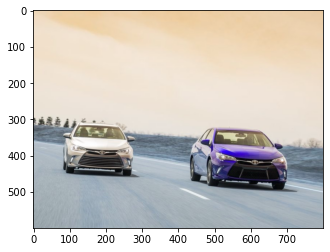

In [38]:
plt.imshow(img)

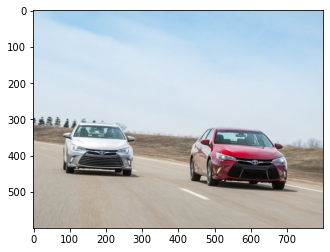

In [39]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [41]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [42]:
print(ClassIndex)

[[3]
 [3]]


In [47]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),  confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)


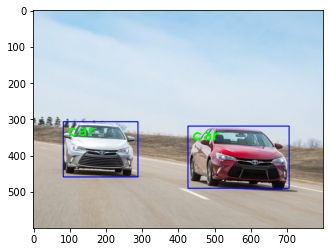

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [55]:
cap = cv2.VideoCapture("video.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.1)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [13]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]
 [10]
 [10]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [13]
 [ 1]
 [ 1]
 [10]
 [10]
 [28]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [10]
 [10]
 [10]
 [ 3]
 [10]
 [13]
 [ 3]
 [10]
 [10]
 [ 3]
 [ 1]
 [ 3]
 [ 8]
 [ 8]
 [ 3]
 [10]
 [ 1]
 [10]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 3]
 [10]
 [41]
 [ 3]
 [ 2]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [10]
 [31]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [28]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [10]
 [10]
 [10]
 [ 2]
 [27]
 [10]
 [ 2]]
[[ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [13]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [10]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [10]
 [ 1]
 [10]
 [ 3]
 [10]
 [10]
 [10]
 [41]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [13]
 [10]
 [ 3]
 [28]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [10]
 [ 8]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [13]
 [10]
 [ 8]
 [ 3]
 [ 3]
 [1

KeyboardInterrupt: 